-------- 
 Time building Training Set 0.915 seconds 
------- 
 Fitting parameters 
-------

Scaled MAE 56.26, LOOCV 76.15
End of Differential Evolution
-----------------------------
LOOCV error 76.15, lambda [[1.08308081e-15]], Iterations 251, Parameters :
Variable charge model
Atom: q  -0.858 c12  0.02586394 c6  0.06410868
-----------------------------
Statistics:
-----------------------------
R2 score:  lrr-de 0.93
MSE score: lrr-de 171940.06
MAE score: lrr-de 326.89
-----------------------------
R2 score:  old params 0.86
MSE score: old params 180801.65
MAE score: old params 338.54
-----------------------------


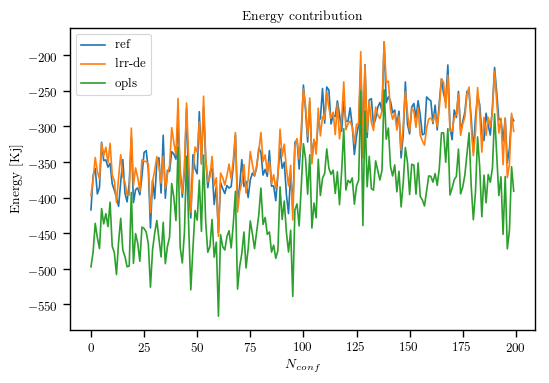

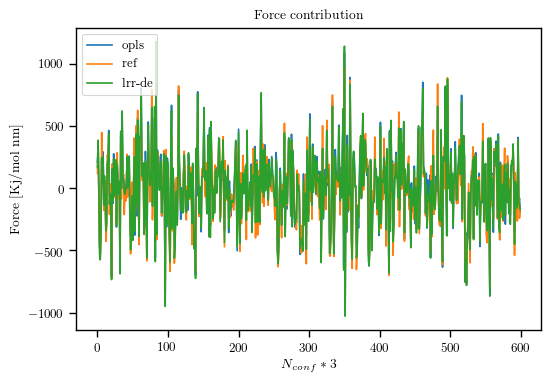

Time fitting 17.936 seconds
------- 
 Testing ~ prediction of the model 
-------
SET: energy, # of water molecules 128
MSE (lrr-de) = 13011.518477611344
MAE (opls) = 68.89104103070754
MAE (lrr-de) = 100.27064377463859
-------
SET: energy, # of water molecules 32
MSE (lrr-de) = 7894.0469029816695
MAE (opls) = 55.491149268640356
MAE (lrr-de) = 81.75022681172598
-------
SET: force, # of water molecules 128
MSE (lrr-de) = 96199.26128022773
MAE (opls) = 256.5955145526734
MAE (lrr-de) = 33.18972845584831
-------
SET: force, # of water molecules 32
MSE (lrr-de) = 72128.5664825458
MAE (opls) = 222.14438806561944
MAE (lrr-de) = 32.90091569254369
-------


In [1]:
# Matteo Peluso Marzo 2019
# email: matteo.peluso@sns.it
# PhD Student Methods and Models for Molecular Sciences

import os
import time

%matplotlib inline

path = "/home/matteopeluso/Scrivania/jupyter-lab/lrr-de/lrr_de_ions/gogs"

# -------------------------------------------------------------------------------------------------------------------------------
# Ensemble of function
fun_path = path + "/func/"
os.chdir(fun_path)

# Import of modules
from parse_input     import *
from multi_objective import *
from testing         import *

# -------------------------------------------------------------------------------------------------------------------------------
# User defined input for the fitting procedure

input_params = {}
flag_files   = {}

input_params['n_conf']        = 113                         # total number of configurations
input_params['n_test']        = 13                          # dimension test set
input_params['n_train']       = 100                         # dimension training set
input_params['index_ion']     = 1                           # Index of the central atom
input_params['N_atom']        = [385, 97]                   # Number of atoms per system
input_params['N_water']       = [128, 32]                   # Number of water molecules per system
input_params['old_params']    = [-1, 5.4e-01,  2.9288e-01]  # Old params opls for comparison
input_params['file_dir']      = path + "/data"              # Directory with QM data
input_params['outdir']        = path + "/data"
input_params['n_functions']   = 1                           # 0 --> Parametri fitting c6,c12
                                                            # 1 --> Parametri fitting q,c6,c12
input_params['q_value']       = -1.0                        # if nfunctions = 0 inserire valore della carica
input_params['counterpoise']  = True                        # if counterpoise correction is present 
input_params['borders']       = np.matrix([10e-15, 10e-1])  # Borders for the hyper parameter

flag_files['topology']        = True                        # topology{}.txt where {} number of water molecules
flag_files['energy']          = True                        # complexation{}.txt
flag_files['force']           = True                        # forces{}.txt
flag_files['coordinate']      = True                        # coordinates{}.txt

# -------------------------------------------------------------------------------------------------------------------------------

# Parsing + Distance matrices
t0 = time.time()
_parser = parser(input_params, flag_files)
_parser.eval_distances()
input_params = _parser.input_params

# -------------------------------------------------------------------------------------------------------------------------------

# Training set
energy_ts = input_setup(input_params, flag="energy", weight=[1,1])
force_ts  = input_setup(input_params, flag="force",  weight=[1,1])
data_set  = training_set(energy_ts, force_ts )

data_set.model_descriptor()

t1 = time.time()
total = t1-t0
print("-------- \n Time building Training Set {} seconds ".format(np.round(total,3)))

# -------------------------------------------------------------------------------------------------------------------------------

# Fitting 
t0 = time.time()
print("------- \n Fitting parameters \n-------")
lrrde = eval_lrrde(data_set)
lrrde.eval_de()

t1 = time.time()
total = t1-t0
print("Time fitting {} seconds".format(np.round(total,3)))

# -------------------------------------------------------------------------------------------------------------------------------

# Testing 
print("------- \n Testing ~ prediction of the model \n-------")

testing_data(data_set = data_set, params = lrrde.params, plot = 'y')
